Load from libraries

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Load Data

In [4]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 353s 2us/step


preprocessing

In [5]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

build the architecture

In [6]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\keert\DeepLearningLab\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
result=model.fit(x_train,y_train_cat,epochs=50,batch_size=64,validation_split=0.2)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.2440 - loss: 6.7634 - val_accuracy: 0.2492 - val_loss: 3.3508
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3089 - loss: 2.6125 - val_accuracy: 0.3232 - val_loss: 2.3639
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.3382 - loss: 2.1904 - val_accuracy: 0.3177 - val_loss: 2.3289
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3724 - loss: 1.9319 - val_accuracy: 0.3468 - val_loss: 2.0176
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.3916 - loss: 1.8037 - val_accuracy: 0.3836 - val_loss: 1.8411
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4120 - loss: 1.7208 - val_accuracy: 0.3752 - val_loss: 1.8446
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 793s 1s/step - accuracy: 0.4306 - loss: 1.6411 - val_accuracy: 0.3982 - val_loss: 1.7743
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4415 - loss: 1.5888 - v

In [9]:
loss,test_accuracy=model.evaluate(x_test,y_test_cat)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4935 - loss: 2.0697
0.4934999942779541


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
predicted label:8


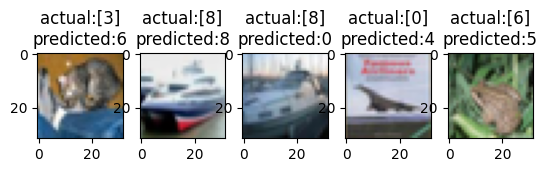

In [10]:
predictions=model.predict(x_test)
predict_label=np.argmax(predictions,axis=1)
print(f"predicted label:{predict_label[1]}")

#Print the predicted image
for i in range(5):
    #print(f"actual:{y_test[i]}\npredicted:{predict_label[i]}")
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"actual:{y_test[i]}\npredicted:{predict_label[i]}")
plt.show()

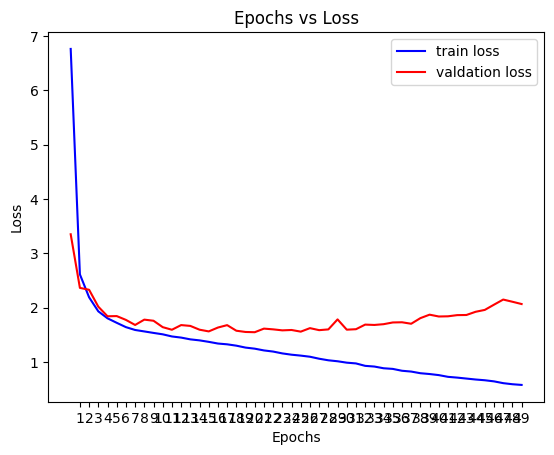

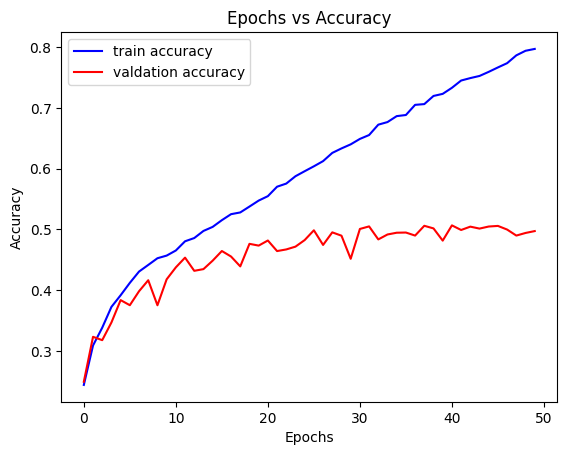

In [11]:
plt.plot(result.history['loss'],label='train loss',color='blue')
plt.plot(result.history['val_loss'],label='valdation loss',color='red')
plt.xticks(np.arange(1,50))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()
plt.show()

plt.plot(result.history['accuracy'],label='train accuracy',color='blue')
plt.plot(result.history['val_accuracy'],label='valdation accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs vs Accuracy")
plt.legend()
plt.show()